<a href="https://colab.research.google.com/github/mborkhat/Digit_Identification_webApp/blob/master/Digit_Web_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary Libaries

In [17]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

From Keras importing dataset Mnist

In [18]:
from keras.datasets import mnist

In [19]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


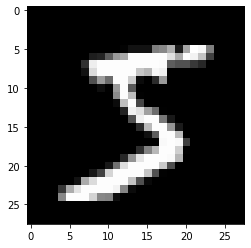

In [21]:
print(y_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()


In [22]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [23]:
X_train/=255.0
X_test/=255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=optimizer)

#model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Train our model!
h = model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2090 - accuracy: 0.9355 - val_loss: 0.0809 - val_accuracy: 0.9740
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0805 - accuracy: 0.9754 - val_loss: 0.0847 - val_accuracy: 0.9764
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0611 - accuracy: 0.9814 - val_loss: 0.0515 - val_accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 0.0538 - val_accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0423 - accuracy: 0.9868 - val_loss: 0.0578 - val_accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.0450 - val_accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.0533 - val_accuracy:

313/313 - 1s - loss: 0.0587 - accuracy: 0.9852


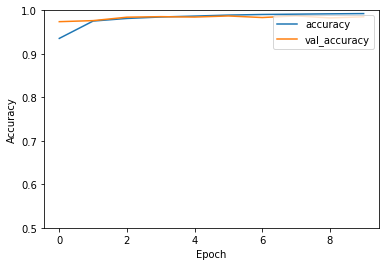

In [25]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

In [26]:
model.save('model.h5')

9


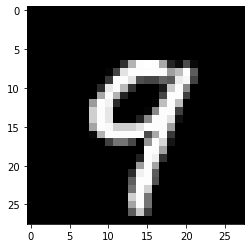

In [27]:
plt.imshow(tf.reshape(X_test[12], [28, 28]), cmap='gray')
# Pass through network...
print(np.argmax(model(tf.expand_dims(X_test[12], 0))))